<a href="https://colab.research.google.com/github/Yunjuliii/TinyML-Colab/blob/main/T1_4_ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T1.4.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---

### In this Colab you’ll explore how filters and convolutions can be used to extract features from images. You’ll see first hand how different filters can extract different features. You’ll also learn about pooling and explore how it can help reduce the amount of information while retaining important features. Finally you will incorporate these layers to a Neural Network to create a Convolutional Neural Network (CNN).

# 1. Convolutions

###Limitations of the previous DNN
In the previous tutorial we saw how to train an image classifier for handwritten digits using the MNIST dataset. This gave us a pretty accurate classifier, but there was an obvious constraint: the images were 28 x 28, grayscale and the digits were centered in the image. In the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Dataset, we face a similar issue. This dataset contains 28 x 28 grayscale images of 10 different apparel.

For example here are a couple of images from Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

A DNN simply learns from the raw pixels what make up a sweater, and what makes up a boot in this context. But consider how it might classify this image?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

(Image is Public domain CC0 from Pixabay: https://pixabay.com/photos/boots-travel-railroad-tracks-181744/)

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28 x 28 grayscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot is.

That's where Convolutions are very powerful. ***A convolution is a filter that passes over an image, processing it, and extracting features that show a commonality in the image.***




---


**Question 1**: When a DNN is used to classify images, the raw pixels are fed into the Dense layer of the Neural Network. Convolutions extract meaningful features from the images and feed these into the Dense layers of the Neural Network. True/False?

**Answer:**True

---


Generating convolutions is very simple -- you simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter.

So, for example, consider this:







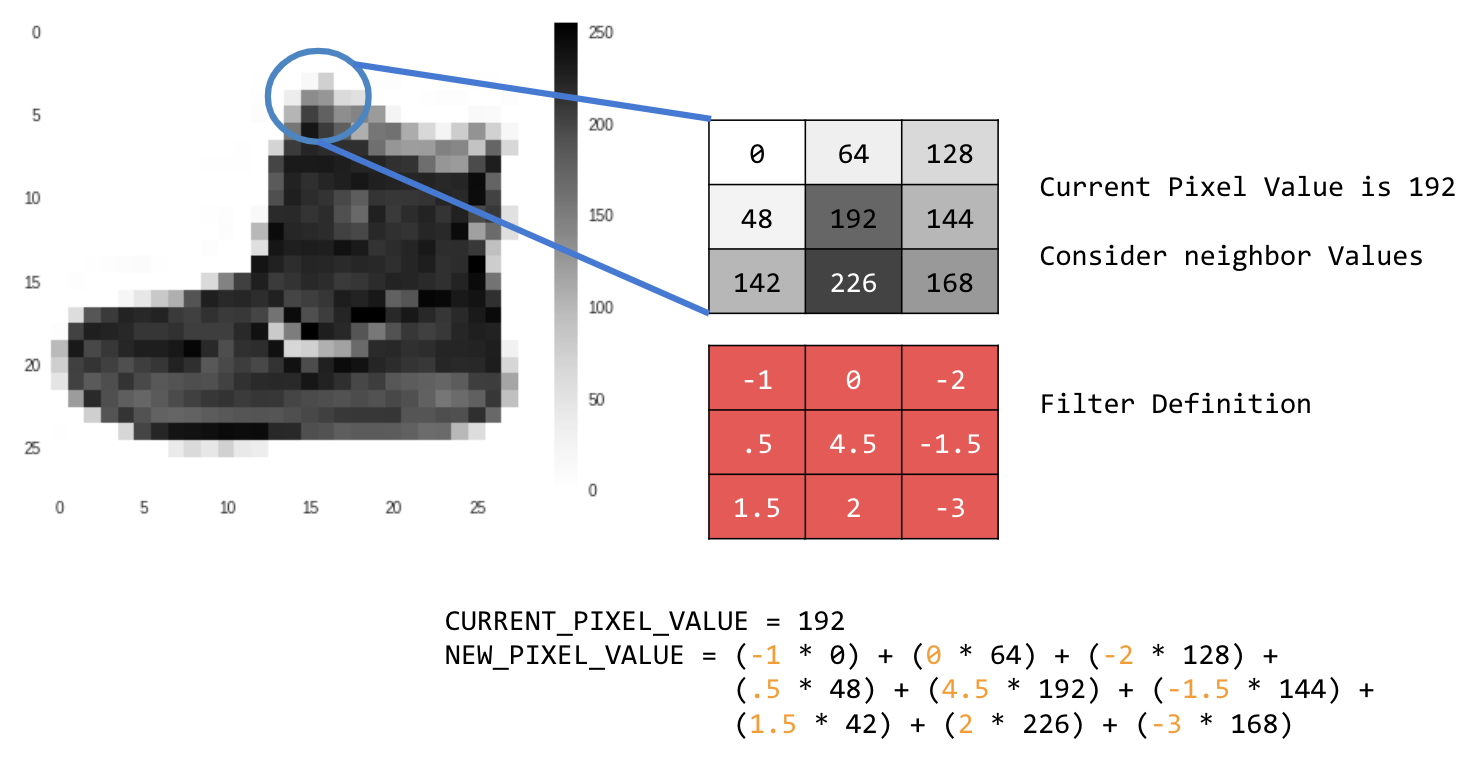

In this case a 3x3 Convolution is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbor values, and multiplying them out by the values specified in the filter, and making the new pixel value the final amount.

Let's explore how convolutions work by creating a basic convolution on a 2D grayscale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines!

Let's start by importing some python libraries -



1.   [matplotlib](https://matplotlib.org/) - visualization of data in Python
2.   [numpy](https://numpy.org/) - scientific computing in Python
3.   [tensorflow](https://www.tensorflow.org/) - open source library to develop and train ML models
4.   [scipy](https://scipy.org/) - scientific computing in Python
5.   [cv2](https://pypi.org/project/opencv-python/) - real-time optimized computer vision library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import misc
i = misc.ascent()

<ipython-input-1-95b7a41d3355>:6: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


Next, we can use the pyplot library to draw the image so we know what it looks like.

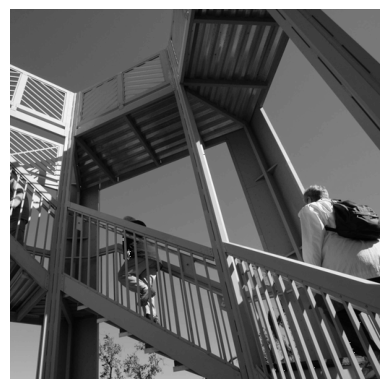

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

We see that this is an image of a stairwell which contains lots of distinct features -- for example there are strong vertical lines.



Before we perform convolution on this image, we need to


1.   Create a destination image to store the convoluted image (here, *i_transformed*)
2.   Create a Filter


The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array.

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

# Experiment with different values for fun effects.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's perform convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter i.e. for eg: the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0 - 255.

Finally we'll load the new value into the transformed image.

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[1][0])
      convolution = convolution + (i[x + 1, y-1] * filter[2][0])
      convolution = convolution + (i[x-1, y] * filter[0][1])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[2][1])
      convolution = convolution + (i[x-1, y+1] * filter[0][2])
      convolution = convolution + (i[x, y+1] * filter[1][2])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

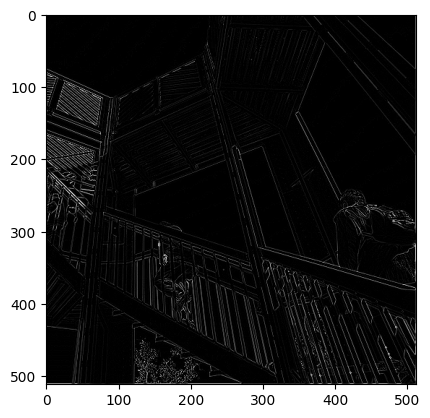

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

So, consider the following filter values, and their impact on the image.

### Vertical Filter
Using the filter values -1, 0, 1, -2, 0, 2, -1, 0, 1 gives us a very strong set of vertical lines:





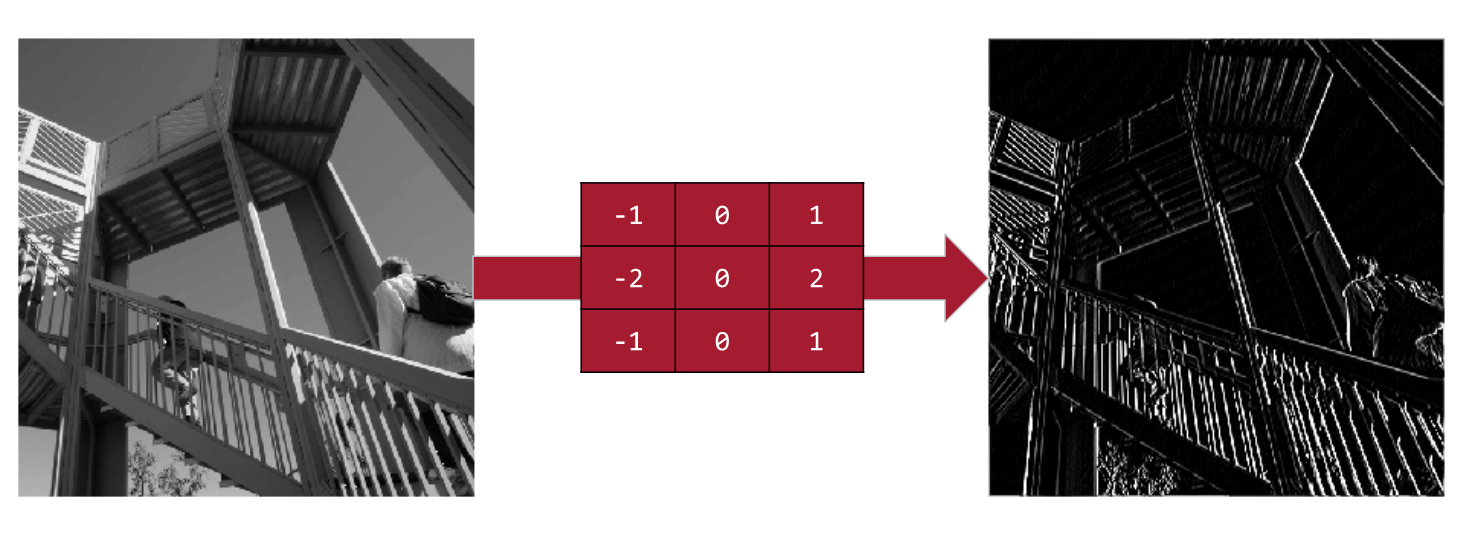

Explore different filters for yourself!

### Pooling

In addition to convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the features that are detected as present.

There are a number of different types of pooling, but here we'll use one called **MAX pooling.**

The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!






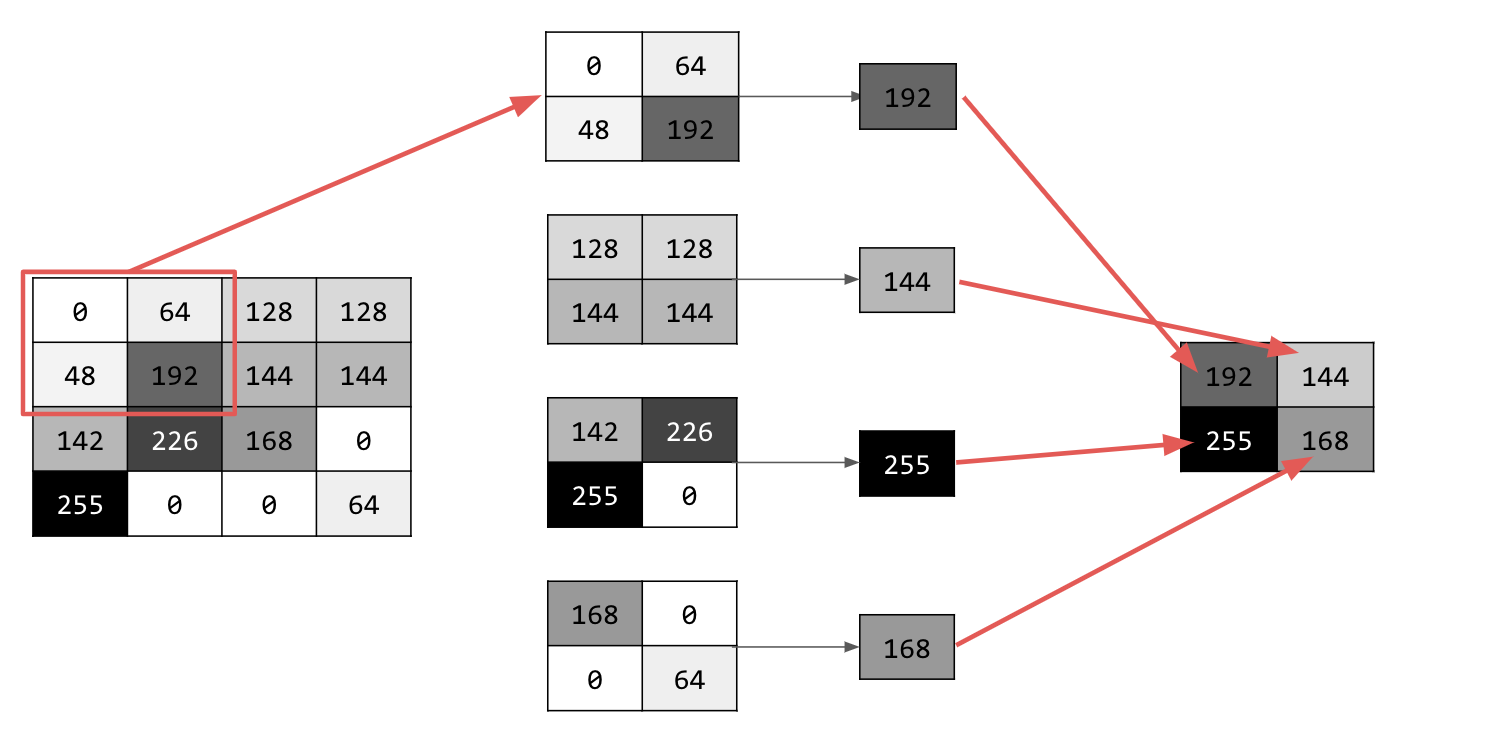

This code will show (4, 4) pooling. Run it to see the output, and you'll see that while the image is 1/4 the size of the original in both length and width respectively (original was 512 x 512, the new image is 128 x 128), the extracted features are maintained!


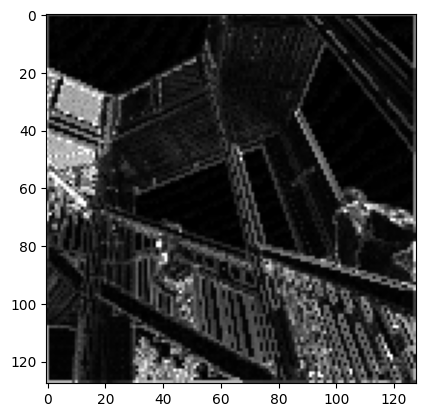

In [ ]:
new_x = int(size_x/4)
new_y = int(size_y/4)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 4):
  for y in range(0, size_y, 4):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x+2, y])
    pixels.append(i_transformed[x+3, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.append(i_transformed[x+2, y+1])
    pixels.append(i_transformed[x+3, y+1])
    pixels.append(i_transformed[x, y+2])
    pixels.append(i_transformed[x+1, y+2])
    pixels.append(i_transformed[x+2, y+2])
    pixels.append(i_transformed[x+3, y+2])
    pixels.append(i_transformed[x, y+3])
    pixels.append(i_transformed[x+1, y+3])
    pixels.append(i_transformed[x+2, y+3])
    pixels.append(i_transformed[x+3, y+3])
    pixels.sort(reverse=True)
    newImage[int(x/4),int(y/4)] = pixels[0]

# Plot the image. Note the size of the axes -- now 128 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()



---


**Question 2**: What is the advantage of using Pooling Layers?

**Answer:**reduce the amount if information

---


In the next section we'll see how to add convolution and pooling layers to a neural network-based ML Model for the Fashion MNIST dataset to make it more efficient -- because it will classify based on features, and not on raw pixels.

# 2.Improving Computer Vision Accuracy using Convolutions

Now, that we've gone through a few tools that make up Convolutional Neural Networks (CNNs) - namely Convolutions and Max pooling, we’ll explore the power of CNNs. We’ll train both a traditional DNN and a CNN and see how CNNs can far outperform standard networks on computer vision tasks. We’ll then dive into both the convolutional and max pooling layers that power the CNN.



First, let's perform the task of image classification using a Deep Neural Network (DNN) containing two layers -- a hidden layer and the output layer (in the shape of the desired output). In addition to this we have the input layer (in the shape of the data).



In the below cell, we:


1.   Load the dataset
2.   Normalize the Images
3.   Define our model (layers, optimizer, loss function, metrics)
4.   Train the model on training set



In [ ]:
# load dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

# normalize images
training_images=training_images / 255.0
val_images=val_images / 255.0

# define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train model
print()
print("Training Model!")
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)

4422102/4422102 [==============================] - 0s 0us/step

Training Model!
Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5927 - accuracy: 0.7953 - val_loss: 0.4983 - val_accuracy: 0.8233
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4400 - accuracy: 0.8464 - val_loss: 0.4638 - val_accuracy: 0.8362
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4087 - accuracy: 0.8559 - val_loss: 0.4314 - val_accuracy: 0.8483
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3905 - accuracy: 0.8615 - val_loss: 0.4473 - val_accuracy: 0.8372
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8671 - val_loss: 0.4074 - val_accuracy: 0.8578
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8700 - val_loss: 0.3978 - val_accuracy: 0.8597
Epoch 7/20
1875/1875 [==============================] - 

### Including Convolution and Maxpooling Layers in addition to Dense Layers

We get an accuracy of about 89% on training and 87% on validation. This is not bad, but how can we make it even better? One way is to use something called Convolutions! They essentially narrow down the content of the image to focus on specific, distinct, features.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

### The concept!

In short, you take a **filter** which is a 2D array (usually 3x3 or 5x5) and pass it over the original image. The underlying pixels of the original image are changed using the filter based on the formula below:






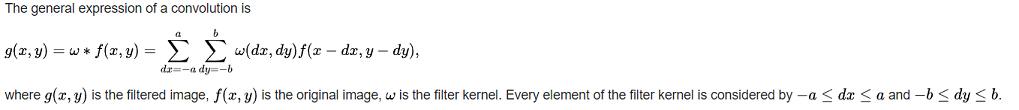

With this, we can do things like *edge detection*! For example, the filter below is popular for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

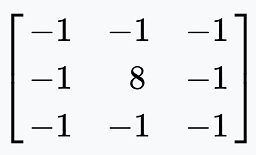

This is perfect for computer vision, because often it's features like edges that distinguish one item for another. And once we move from raw image data to feature data, the amount of information needed is much less as we'll train only on the highlighted features.

**That's the concept of Convolutional Neural Networks!** - Add few layers to perform convolution before we have dense layers. In this way the information going to the dense layers is more focused, and possibly more accurate.

---


**Question 3**: What are the two additional types of layers in Convolutional Neural Networks?

**Answer:**convolutional layer and pooling layer

---


### Load Data

First we gather data. You'll notice that there's a difference - the training data needs to be reshaped. This is because the first convolution expects a single tensor containing everything, so instead of 60000 28x28x1 items in a list, we have a single 4D list that is 60000x28x28x1. This holds good for the validation set as well. If we don't do this, we get an error while training as the Convolutions do not recognize the shape.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()
print(training_images.shape)

# reshape
training_images=training_images.reshape(60000, 28, 28, 1)
print(training_images.shape)

val_images = val_images.reshape(10000,28,28,1)

# normalization
training_images=training_images / 255.0
val_images=val_images/255.0

(60000, 28, 28)
(60000, 28, 28, 1)


Second, we define our model. Now instead of the input layer at the top, we're going to add a **Convolution Layer**. The `tf.keras.layers.Conv2D()` API represents this layer. The parameters of this API are:

1. **64** - The number of convolutions we want to generate. Purely arbitrary, but good to start with something in the order of 64
2. **(3, 3)** - The size of the Convolution/kernel, in this case a 3x3 grid
3. **'relu'** - The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

We follow the Convolution with a **MaxPooling layer** which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. The `tf.keras.layers.MaxPooling2D()` API represents this layer. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels.




---


**Question 4**: If a (2, 2) pooling layer is used, what percentage of the original image size will the new image be?

**Answer:**1/4

---

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We can call the `model.summary()` API to see the size and shape of the network. We notice that after every MaxPooling layer, the image size is reduced.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 20)               

Finally, we train the model on the training data. Observe that the training takes longer! We also observe the validation loss and accuracy.

In [ ]:
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 91s 48ms/step - loss: 0.5359 - accuracy: 0.8057 - val_loss: 0.3979 - val_accuracy: 0.8614
Epoch 2/20
1875/1875 [==============================] - 89s 47ms/step - loss: 0.3381 - accuracy: 0.8781 - val_loss: 0.3394 - val_accuracy: 0.8820
Epoch 3/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2874 - accuracy: 0.8964 - val_loss: 0.3370 - val_accuracy: 0.8808
Epoch 4/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2576 - accuracy: 0.9056 - val_loss: 0.2997 - val_accuracy: 0.8925
Epoch 5/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2367 - accuracy: 0.9133 - val_loss: 0.2758 - val_accuracy: 0.9028
Epoch 6/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2186 - accuracy: 0.9195 - val_loss: 0.2816 - val_accuracy: 0.9025
Epoch 7/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2024 - accuracy: 0.9254 - val_loss: 0.2807 -

KeyboardInterrupt: 

We observe that the accuracy has gone up to about 96% on the training data and 91% on the validation data. That's significant, and a step in the right direction!

Try running it for more epochs -- say about 100, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called **'overfitting'** which will be discussed later.

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you!)

# 3.Visualizing the Convolutions and Pooling

In this section, we'll visualize the convolution and pooling layers to better understand how the model “sees” the world. Hopefully this will give you more insight into how neural networks see the world as compared to how we see the world!



This code will show us the convolutions graphically. The `print (test_labels[:100])` code snippet shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 (not exhaustive) are all the same value - 9. They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the final dense layers are trained on this resulting data, it's working with a lot less, more targeted, data -- the features generated by this convolution/pooling combination.

In [ ]:
# (index, class label)
print([(x, val_labels[x]) for x in range(100)])

[(0, 9), (1, 2), (2, 1), (3, 1), (4, 6), (5, 1), (6, 4), (7, 6), (8, 5), (9, 7), (10, 4), (11, 5), (12, 7), (13, 3), (14, 4), (15, 1), (16, 2), (17, 4), (18, 8), (19, 0), (20, 2), (21, 5), (22, 7), (23, 9), (24, 1), (25, 4), (26, 6), (27, 0), (28, 9), (29, 3), (30, 8), (31, 8), (32, 3), (33, 3), (34, 8), (35, 0), (36, 7), (37, 5), (38, 7), (39, 9), (40, 6), (41, 1), (42, 3), (43, 7), (44, 6), (45, 7), (46, 2), (47, 1), (48, 2), (49, 2), (50, 4), (51, 4), (52, 5), (53, 8), (54, 2), (55, 2), (56, 8), (57, 4), (58, 8), (59, 0), (60, 7), (61, 7), (62, 8), (63, 5), (64, 1), (65, 1), (66, 2), (67, 3), (68, 9), (69, 8), (70, 7), (71, 0), (72, 2), (73, 6), (74, 2), (75, 3), (76, 1), (77, 2), (78, 8), (79, 4), (80, 1), (81, 8), (82, 5), (83, 9), (84, 5), (85, 0), (86, 3), (87, 2), (88, 0), (89, 6), (90, 5), (91, 3), (92, 6), (93, 7), (94, 1), (95, 8), (96, 0), (97, 1), (98, 4), (99, 2)]


In [ ]:
val_images[0].reshape(28,28)
val_images[0].shape


(28, 28, 1)

Below we define a function to plot an image.

In [ ]:
def show_image(img):
  plt.figure()
  plt.imshow(val_images[img].reshape(28,28))
  plt.grid(False)
  plt.show()

We take images at indices 0, 23, 28 for example

In [ ]:
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28

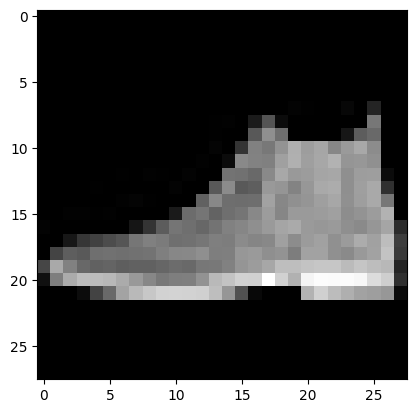

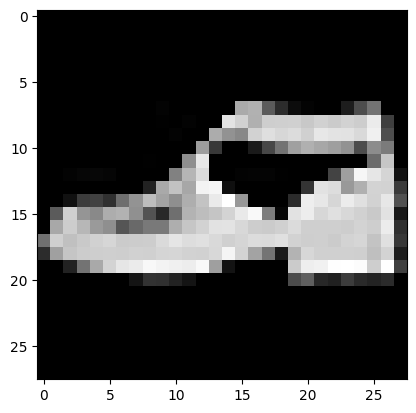

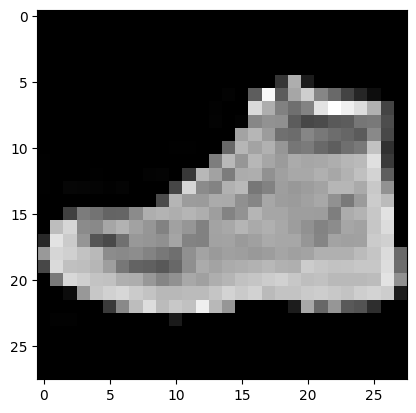

In [ ]:
show_image(FIRST_IMAGE)
show_image(SECOND_IMAGE)
show_image(THIRD_IMAGE)

For shoes (0, 23, 28) and Convolution_Number = 1 we see the sole being filtered out very clearly

1/1 [==============================] - 0s 115ms/step
f1 of  0 - (1, 26, 26, 64)
1/1 [==============================] - 0s 21ms/step
f2 of  0 - (1, 26, 26, 64)
1/1 [==============================] - 0s 22ms/step
f3 of  0 - (1, 26, 26, 64)
1/1 [==============================] - 0s 24ms/step
f1 of  1 - (1, 13, 13, 64)
1/1 [==============================] - 0s 92ms/step
f2 of  1 - (1, 13, 13, 64)
1/1 [==============================] - 0s 33ms/step
f3 of  1 - (1, 13, 13, 64)


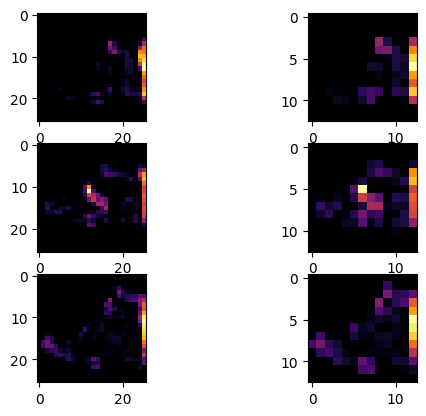

In [ ]:
f, axarr = plt.subplots(3,2)  # the subplot will have 3 rows and 2 columns (total of 6 images) - conv and pooling

CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  print("f1 of ", x, "-", f1.shape)
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  print("f2 of ", x, "-", f2.shape)
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  print("f3 of ", x, "-", f3.shape)
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)



---


**Question 5**: What do the 6 images above represent?

**Answer:**There are 3 rows of pictures, each row is a picture after convolutional layer and a picture after pooling layer.

---